#Black Friday Sales Prediction

- A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

- Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

- https://datahack.analyticsvidhya.com/contest/black-friday/#ProblemStatement

- Description of data set is given in above link

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

- importing all the required libraries and importing dataset from github account to saledf dataframe

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
Saledf = pd.read_csv('/content/drive/MyDrive/BlackFridayPredictionClean.csv')

In [5]:
Saledf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,F,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,F,0,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,M,6,16,C,4,0,8,8.0,16.0,7969


- Checking Dataset and No of rows and columns

In [6]:
row, col = Saledf.shape
row, col

(550068, 12)

- Information about dataset

In [7]:
Saledf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  int64  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  int64  
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          550068 non-null  float64
 10  Product_Category_3          550068 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 50.4+ MB


# Summary of above output

- Above dataset contains 12 columns
- There are 5 columns are in integer datatype, 2 columns are in float datatype and 5 columns are in object datatype.
- Above dataset have 550068 entries.

# Checking for null values in dataset

In [8]:
Saledf.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [12]:
def Gender(x):
  if x=='F':return 0
  else: return 1

In [13]:
Saledf.Gender = Saledf.Gender.apply(Gender)

In [14]:
Saledf.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3,8.0,16.0,8370
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,A,2,0,12,8.0,16.0,1422
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,16.0,1057
4,1000002,P00285442,1,6,16,C,4,0,8,8.0,16.0,7969


# converting categorical values to numbers for City category column

In [15]:
Saledf.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [16]:
citydf = pd.get_dummies(Saledf.City_Category, prefix='City')

In [17]:
Saledf1 = pd.concat([Saledf, citydf], axis=1)

In [18]:
Saledf1.drop(columns=['City_Category'], axis=1, inplace=True)
Saledf1.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_A,City_B,City_C
0,1000001,P00069042,0,0,10,2,0,3,8.0,16.0,8370,1,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200,1,0,0
2,1000001,P00087842,0,0,10,2,0,12,8.0,16.0,1422,1,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,16.0,1057,1,0,0
4,1000002,P00285442,1,6,16,4,0,8,8.0,16.0,7969,0,0,1


# Extract Train and test dataset

In [19]:
X= Saledf1.drop(columns=['Purchase','Product_ID'],axis=1)
y= Saledf1.Purchase.values.reshape(-1,1)

In [20]:
X.shape,y.shape

((550068, 12), (550068, 1))

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.25, random_state=1234
)

In [23]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((412551, 12), (137517, 12), (412551, 1), (137517, 1))

# Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

In [26]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

- Intercept for the best fit line

In [28]:
m = model.intercept_
m

array([-4358.27721504])

- coefficients for 12 columns

In [29]:
slop = model.coef_
slop

array([[ 1.73462472e-02,  5.19734338e+02,  1.24151533e+02,
         7.34323019e+00,  1.04659069e+01, -5.25324054e+01,
        -4.02660844e+02, -1.54247051e+00, -1.56079622e+02,
        -2.75041053e+02, -1.19377083e+02,  3.94418136e+02]])

-Above output giving in exponensial values: to convert into normal values we using below with statement

In [31]:
with np.printoptions(precision=3, suppress=True):
  print(m,slop)

[-4358.277] [[   0.017  519.734  124.152    7.343   10.466  -52.532 -402.661   -1.542
  -156.08  -275.041 -119.377  394.418]]


In [32]:
X_train.columns

Index(['User_ID', 'Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'City_A', 'City_B', 'City_C'],
      dtype='object')

- Creating Dataframe for coefficients for particular columns

In [36]:
dfcoeff = pd.DataFrame({'col':X_train.columns,'coeff':slop.flatten()})
dfcoeff

,col,coeff
0,User_ID,0.017346
1,Gender,519.734338
2,Age,124.151533
3,Occupation,7.343230
4,Stay_In_Current_City_Years,10.465907
5,Marital_Status,-52.532405
6,Product_Category_1,-402.660844
7,Product_Category_2,-1.542471
8,Product_Category_3,-156.079622
9,City_A,-275.041053


- Analysing coefficients for each column using barplot

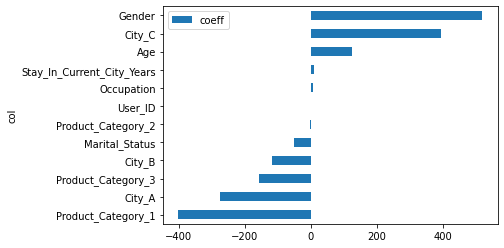

In [38]:
dfcoeff.sort_values('coeff').set_index('col').plot.barh()

- creating imp column to get coefficient values between 0 to 1 by using below formula

In [39]:
dfcoeff['imp']=  np.sqrt((dfcoeff.coeff/dfcoeff.coeff.abs().max())**2)
dfcoeff.sort_values('imp',ascending=False)

,col,coeff,imp
1,Gender,519.734338,1.000000
6,Product_Category_1,-402.660844,0.774744
11,City_C,394.418136,0.758884
9,City_A,-275.041053,0.529195
8,Product_Category_3,-156.079622,0.300307
2,Age,124.151533,0.238875
10,City_B,-119.377083,0.229689
5,Marital_Status,-52.532405,0.101075
4,Stay_In_Current_City_Years,10.465907,0.020137
3,Occupation,7.343230,0.014129


# Inference from above output
- Gender column have high impact on purchase value
- User id and product category 2 has low impact on purchase value
- city category like city A,B,Product category 1 has negative impact on purchase value
- if users buying product from city c increases than amount purchase increases.
- if users buying product from product category 1 from city A increases than amount purchase decreases

In [40]:
y_learnt = model.predict(X_train)
y_learnt[:5]

array([[ 4889.46349247],
       [10660.00801583],
       [ 9576.86494263],
       [ 8638.91522608],
       [10329.62728132]])

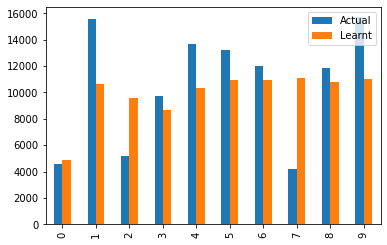

In [41]:
dflearnt = pd.DataFrame({'Actual': y_train[:,0],
                     'Learnt': y_learnt[:,0]})
dflearnt.head(10).plot(kind='bar')

#importing metrics from sklearn to check mean square error


In [42]:
from sklearn.metrics import mean_squared_error as mse

In [43]:
mse_ylearnt = mse(y_train,y_learnt)
mse_ylearnt

21936472.292752147

In [44]:
y_pred = model.predict(X_test)
y_pred[:5]

array([[7819.24210017],
       [9555.89829873],
       [9229.37774425],
       [8012.91532911],
       [5882.62727572]])

In [45]:
mse_test = mse(y_test,y_pred)
mse_test

21865507.920032706

#R2 score

In [46]:
from sklearn.metrics import r2_score

In [47]:
r2_real = r2_score(y_test,y_pred)
r2_real

0.13133620215364272

In [49]:
n= X.shape[0]
k= X.shape[1]
n,k

(550068, 12)

In [50]:
Adj_R2 = 1-(((1-r2_real)*(n-1))/(n-k-1))
Adj_R2

0.13131725138403938